<a href="https://colab.research.google.com/github/pesado-dev/DATA_SCIENCE/blob/main/Desafio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
# Carregar dados
data = pd.read_csv('/content/data.csv')

In [ ]:
# Descrição estatística dos dados
print(data.describe())

           Quantity     UnitPrice    CustomerID
count  12461.000000  12461.000000   8956.000000
mean       7.477249      3.973280  15598.129299
std       93.885564     17.253932   1748.194062
min    -9360.000000      0.000000  12395.000000
25%        1.000000      1.250000  14307.000000
50%        2.000000      2.510000  15646.000000
75%        6.000000      4.210000  17211.000000
max     2880.000000    940.870000  18239.000000


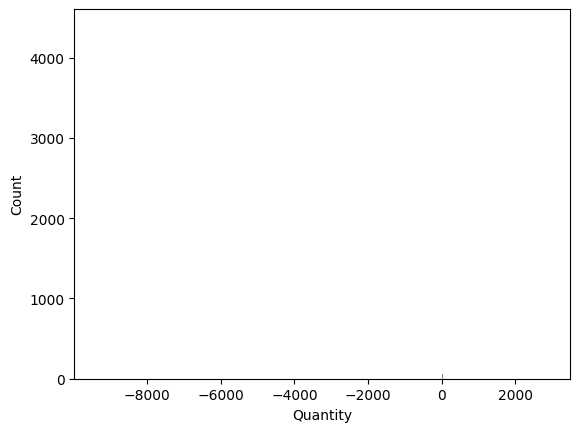

In [ ]:
# Visualização das distribuições
sns.histplot(data['Quantity'])
sns.histplot(data['UnitPrice'])
plt.show()

In [ ]:
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Verificar dados nulos
data.isnull().sum()


InvoiceNo         0
StockCode         0
Description      45
Quantity          1
InvoiceDate       1
UnitPrice         1
CustomerID     3506
Country           1
dtype: int64

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
data[['Quantity', 'UnitPrice']] = scaler.fit_transform(data[['Quantity', 'UnitPrice']])

# Seleção de variáveis relevantes
X = data[['Quantity', 'UnitPrice']]


In [ ]:
# Remover dados nulos e duplicados
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


In [ ]:
data.fillna(data.mean(), inplace=True)

<ipython-input-36-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
# Seleção de variáveis relevantes
X = data[['Quantity', 'UnitPrice']]


In [ ]:
# Encontrar quantidade ideal de clusters
clusters_range = range(2, 10)
silhouette_scores = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

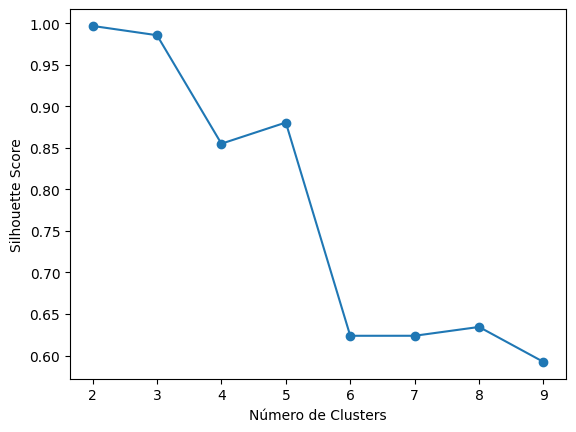

In [ ]:
# Plotar gráfico de Elbow
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Escolher número ideal de clusters (exemplo)
num_clusters = 3

In [ ]:
# Implementar KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


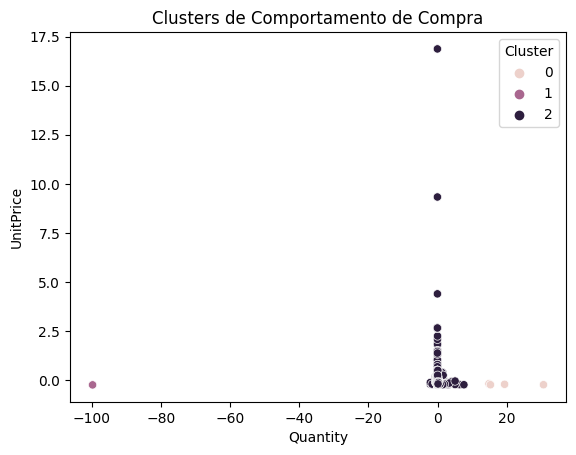

In [ ]:
# Visualizar os clusters
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=data)
plt.title('Clusters de Comportamento de Compra')
plt.show()
